### Compare theoretical (null) model for the distribution of the Maximum Consecutive Overlap $\omega$ with experimental data

In [15]:
import numpy as np
import scipy as sp
from scipy import stats
from scipy.special import binom
import matplotlib.pyplot as plt
from random import choices

In [16]:
l=20 #resource length
L=50 #predator length
bases=4

In [17]:
def my_binom (a,b): #adapted binomial coefficient
    if (a<0 or a<b):
        return 0
    else:
        return binom(a,b)

In [18]:
def n1_part (d,a):
    list1=np.empty(0)
    list2=np.empty(0)
    for r in range (1,d+2):
        list1=np.append( list1, (np.power(-1,r))*(my_binom(d+1,r))*(my_binom(l-r*(a+1),d)) )
        list2=np.append( list2, (np.power(-1,r))*(my_binom(d+1,r))*(my_binom(l-r*a,d)) )
    return np.sum(list1)-np.sum(list2)

In [19]:
def n1 (a):
    list3=np.empty(0)
    for d in range (0,l+1):
        list3=np.append(list3, ((bases-1)**d) * n1_part(d,a))
    return (L-l+1)*(bases**(L-l))*(np.sum(list3))

In [20]:
def n2_part (d,a,p):
    list1=np.empty(0)
    list2=np.empty(0)
    for r in range (1,d+2):
        list1=np.append( list1, np.power(-1,r)*(my_binom(d+1,r))*(my_binom(l+p-r*(a+1),d)) )
        list2=np.append( list2, np.power(-1,r)*(my_binom(d+1,r))*(my_binom(l+p-r*a,d)) )
    return np.sum(list1)-np.sum(list2)

In [21]:
def n2(a):  
    list4=np.empty(0)
    for p in range (-l+1,0):
        list3=np.empty(0)
        for d in range (0,l+p+1):
            list3=np.append(list3, ((bases-1)**d) * n2_part(d,a,p))
        list4=np.append(list4, ((bases**(L-l-p))*np.sum(list3)))
            
    return np.sum(list4)

In [22]:
def n3_part (d,a,p):
    list1=np.empty(0)
    list2=np.empty(0)
    for r in range (1,d+2):
        list1=np.append( list1, np.power(-1,r)*(my_binom(d+1,r))*(my_binom(L-p-r*(a+1),d)) )
        list2=np.append( list2, np.power(-1,r)*(my_binom(d+1,r))*(my_binom(L-p-r*a,d)) )
    return np.sum(list1)-np.sum(list2)

In [23]:
def n3(a):  
    list4=np.empty(0)
    for p in range (L-l+1,L):
        list3=np.empty(0)
        for d in range (0,L-p+1):
            list3=np.append(list3, np.power(bases-1,d) * n3_part(d,a,p))
        list4=np.append(list4, (bases**(p))*(np.sum(list3)))
            
    return np.sum(list4)

In [24]:
#compute pi(a) - exact formula

appo=0
#appo_b=0
norm=0
pi_dist=np.zeros(l+1)
#distrib_b=distrib

#compute normalization
for a in range (0,l+1):
    norm+=n1(a)+n2(a)+n3(a)

for a in range (0,l+1):
    appo=(n1(a)+n2(a)+n3(a))/((bases**L)*(L+l-1))
#    appo_b=(n1(a)+n2(a)+n3(a))/norm #should be equivalent
    pi_dist[a]=appo
#    distrib_b[a]=appo
print(pi_dist)
print(np.sum(pi_dist))
#print(distrib_b)
#print(np.sum(distrib_b)

[8.80135924e-02 4.24678903e-01 3.45390075e-01 1.07492525e-01
 2.64134238e-02 6.16871555e-03 1.42151431e-03 3.25497463e-04
 7.41232921e-05 1.67791256e-05 3.77236933e-06 8.41375710e-07
 1.85886587e-07 4.06002653e-08 8.74295939e-09 1.84914772e-09
 3.81935050e-10 7.63448306e-11 1.45387341e-11 2.55713003e-12
 4.08613562e-13]
0.9999999999999998


In [25]:
# compute pi'(a) - exact formula
appo=0
norm=0
T=4
pi_pr_dist=np.zeros(l+1)

for a in range (T,l+1):
    norm+=pi_dist[a]

for a in range (T,l+1):
    pi_pr_dist[a]=(pi_dist[a]*(np.sign(a-T+1)))/norm

#print(pi_pr_dist,norm)
#print(np.sum(pi_pr_dist))

In [33]:
#load experimental histogram of species abundance for comparison
path_to_folders="/Users/francescomambretti/Documents/Work/Synthetic_biodiversity_statistical_physics/experim_data/results_all"
path_to_histo_omega="/negative/R1_all_key_filter/min_Q_10/1_R6_negative_R1/"
path_to_histo_omega2="/oligo1_proto06/R1_all_key_filter/min_Q_10/2_R6_06_R1/"

histo_omega_experim=np.loadtxt(path_to_folders+path_to_histo_omega+"/histo_omega_all.txt",usecols=(0,),unpack=True)
histo_omega_experim2=np.loadtxt(path_to_folders+path_to_histo_omega2+"/histo_omega_all.txt",usecols=(0,),unpack=True)
Ns=np.sum(histo_omega_experim) #population size
print(Ns)

700836.0


In [34]:
mean_null=pi_pr_dist*Ns
err_null=np.sqrt(Ns*pi_pr_dist*(1-pi_pr_dist))
i=0

for el,err_el in zip(mean_null,err_null):
    print (" %d, %.3f, %.3f" % (i, el, err_el))
    i+=1

 0, 0.000, 0.000
 1, 0.000, 0.000
 2, 0.000, 0.000
 3, 0.000, 0.000
 4, 537735.060, 353.756
 5, 125585.182, 321.063
 6, 28939.758, 166.568
 7, 6626.608, 81.018
 8, 1509.032, 38.804
 9, 341.596, 18.478
 10, 76.799, 8.763
 11, 17.129, 4.139
 12, 3.784, 1.945
 13, 0.827, 0.909
 14, 0.178, 0.422
 15, 0.038, 0.194
 16, 0.008, 0.088
 17, 0.002, 0.039
 18, 0.000, 0.017
 19, 0.000, 0.007
 20, 0.000, 0.003


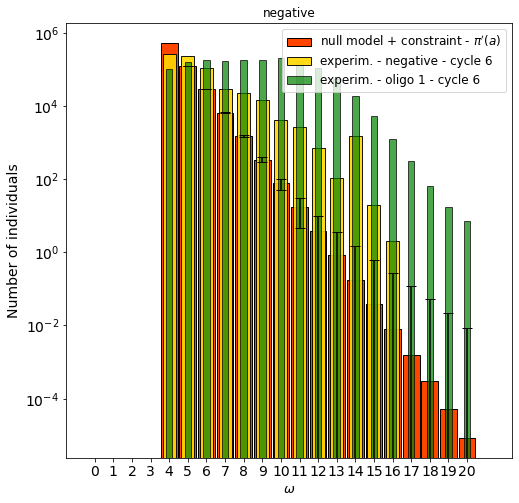

In [37]:
plt.rcParams['figure.figsize'] = [8, 8]

plt.bar(range(0,l+1),pi_pr_dist*Ns,color='orangered',edgecolor='black',
        alpha=1.0,label='null model + constraint - $\pi^{\prime}(a)$',width=0.9)
plt.errorbar(range(0,l+1),pi_pr_dist*Ns,markersize=8,yerr=3*err_null,capsize=5,color='black',linestyle='none')
plt.bar(range(T,l+2),histo_omega_experim[T:],color='gold',edgecolor='black',
        alpha=0.9,label='experim. - negative - cycle 6',width=0.7)
plt.bar(range(T,l+2),histo_omega_experim2[T:],color='green',edgecolor='black',
        alpha=0.7,label='experim. - oligo 1 - cycle 6 ',width=0.35)

plt.xticks(np.arange(0,l+1,1),fontsize=14)
plt.yticks(fontsize=14)

plt.xlabel("$\omega$", fontsize=13)
plt.ylabel("Number of individuals", fontsize=14)

plt.yscale('log')
name='negative'
plt.title(name)

plt.legend(fontsize=12)
plt.show()
#plt.savefig(name+'.png',dpi=300)